# **Walmart : Confidence Interval and CLT**:

---





In [1]:
# Importing th required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,binom,gennorm,expon

In [2]:
#Loading the dataset

data = pd.read_csv("walmart_data.csv")

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
data.shape

(550068, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
data.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


In [7]:
data.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [8]:
data.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,20
Purchase,18105


In [9]:
data["User_ID"].value_counts()

,count
User_ID,
1001680,1026
1004277,979
1001941,898
1001181,862
1000889,823
...,...
1002690,7
1002111,7
1005810,7


In [10]:
data["Product_ID"].value_counts()

,count
Product_ID,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470
...,...
P00314842,1
P00298842,1
P00231642,1


In [11]:
data["Gender"].value_counts()

,count
Gender,
M,414259
F,135809


In [12]:
data["Age"].value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


In [13]:
data["Occupation"].value_counts()

,count
Occupation,
4,72308
0,69638
7,59133
1,47426
17,40043
20,33562
12,31179
14,27309
2,26588


In [14]:
data["City_Category"].value_counts()

,count
City_Category,
B,231173
C,171175
A,147720


In [15]:
data["Stay_In_Current_City_Years"].value_counts()

,count
Stay_In_Current_City_Years,
1,193821
2,101838
3,95285
4+,84726
0,74398


In [16]:
data["Marital_Status"].value_counts()

,count
Marital_Status,
0,324731
1,225337


In [17]:
data["Product_Category"].value_counts()

,count
Product_Category,
5,150933
1,140378
8,113925
11,24287
2,23864
6,20466
3,20213
4,11753
16,9828


In [18]:
data["Purchase"].value_counts()

,count
Purchase,
7011,191
7193,188
6855,187
6891,184
7012,183
...,...
23491,1
18345,1
3372,1


In [19]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [20]:
#Creating a correlation table

data_cpy = data[["User_ID","Gender","Age","Occupation","City_Category","Stay_In_Current_City_Years","Marital_Status","Product_Category","Purchase"]]
data_cpy["Gender"].replace(['M', 'F'], [1, 0], inplace=True)
data_cpy["City_Category"].replace(['A', 'B','C'], [1, 2,3], inplace=True)
data_cpy["Age"].replace(["0-17","18-25","26-35","36-45","46-50","51-55","55+"],[1,2,3,4,5,6,7], inplace=True)
data_cpy["Stay_In_Current_City_Years"].replace(["4+"],[4],inplace=True)

data_cpy.corr()


<ipython-input-20-f785264269ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cpy["Gender"].replace(['M', 'F'], [1, 0], inplace=True)
<ipython-input-20-f785264269ce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cpy["City_Category"].replace(['A', 'B','C'], [1, 2,3], inplace=True)
<ipython-input-20-f785264269ce>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cpy["Age"].replace(["0-17","18-25","26-35","36-45","46-5

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.033474,0.032698,-0.023971,0.022859,-0.030737,0.020443,0.003825,0.004716
Gender,-0.033474,1.000000,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,0.060346
Age,0.032698,-0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.015839
Occupation,-0.023971,0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.020833
City_Category,0.022859,-0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,0.061914
Stay_In_Current_City_Years,-0.030737,0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,0.005422
Marital_Status,0.020443,-0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,-0.000463
Product_Category,0.003825,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,-0.343703
Purchase,0.004716,0.060346,0.015839,0.020833,0.061914,0.005422,-0.000463,-0.343703,1.000000


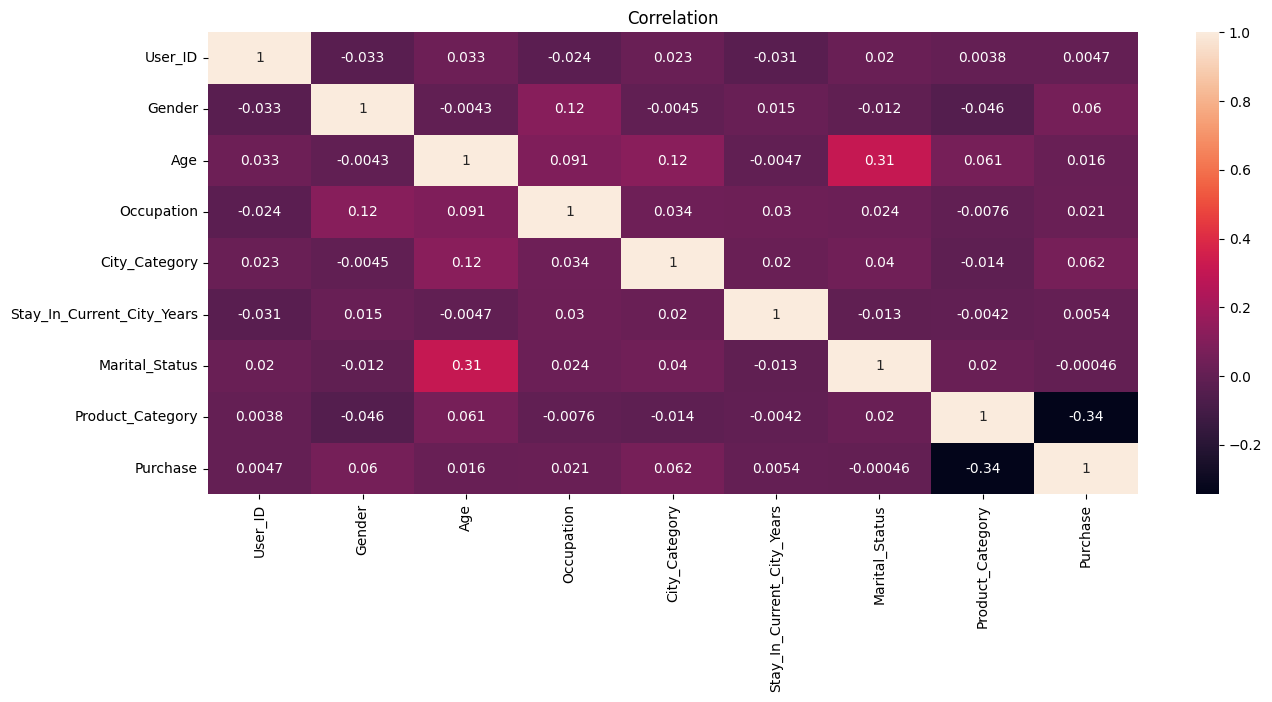

In [21]:
#Creating a Heat Map to analyse the correlation between each variable

plt.figure(figsize=(15,6))

sns.heatmap(data_cpy.corr(), annot=True)
plt.title("Correlation")

plt.show()

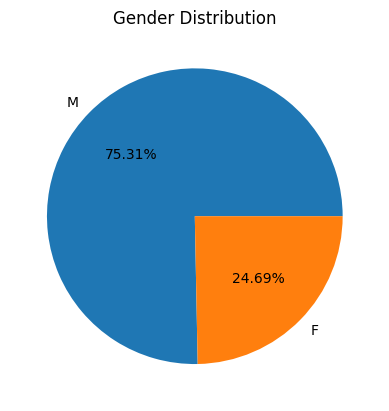

In [22]:
plt.pie(data["Gender"].value_counts().values , labels= data["Gender"].value_counts().index , autopct = "%.2f%%")
plt.title("Gender Distribution")

plt.show()

**Insight :**



* The pie chart indicates that  most of the customers of the Black Friday sale are Male with 75.31% whereas female customers are 24.69%.

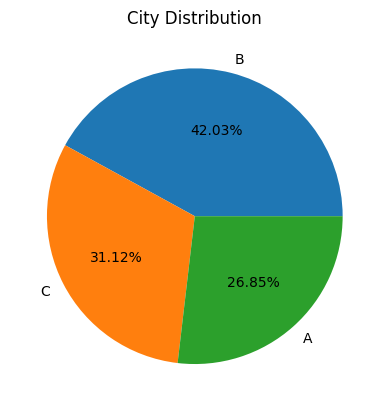

In [23]:
plt.pie(data["City_Category"].value_counts().values , labels= data["City_Category"].value_counts().index , autopct = "%.2f%%")
plt.title("City Distribution")

plt.show()

**Insight :**


*  Most of the customers are from the city B followed by city C and A with very minimal difference.



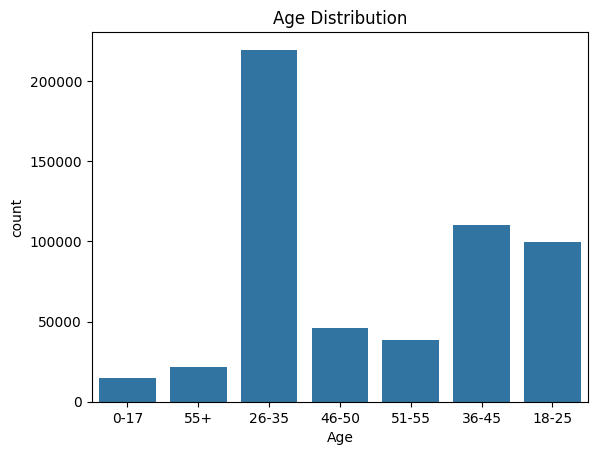

In [24]:
sns.countplot(x = data["Age"])
plt.title("Age Distribution")

plt.show()

**Insight :**


*   Most of the customers are in the afe range 26 - 35 followed by 36 - 45 and 18 - 25.

*   This implies that Walmart has customers of almost all age group.


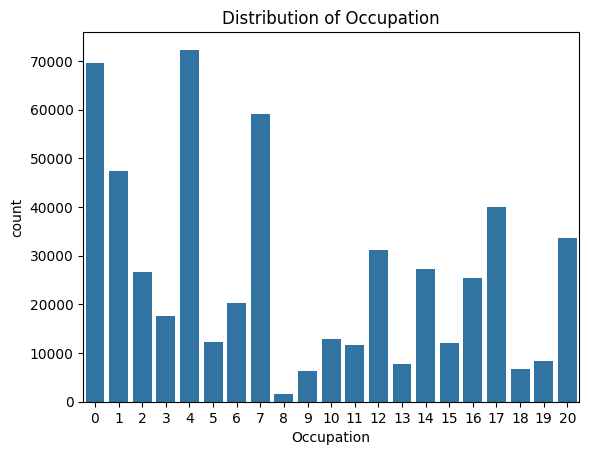

In [25]:
sns.countplot(x = data["Occupation"])
plt.title("Distribution of Occupation")

plt.show()

**Insight :**


*   The above graph specifies that Walmart attracts customers from wide range of occupation category.

*   As per Black Friday Sale most of the customers are of category 4.

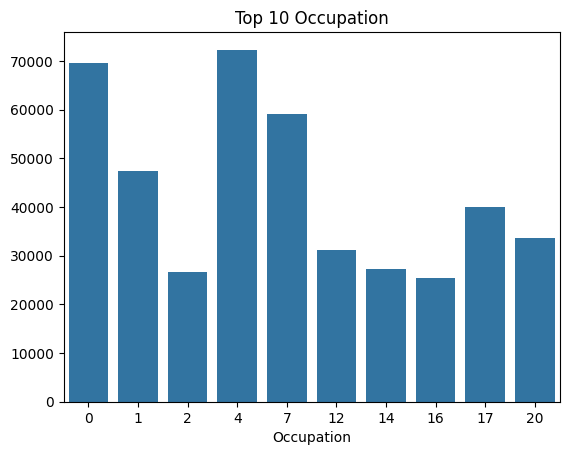

In [26]:
top_occ = data["Occupation"].value_counts()[:10]
sns.barplot(x = top_occ.index , y = top_occ.values )
plt.title("Top 10 Occupation")

plt.show()

**Insight :**


*   The above graph shows the top 10 occupation of the customers who bought from the Black Friday Sale.

*   Customers from occupation 4 , 0 and 7 have a high need of products from walmart.

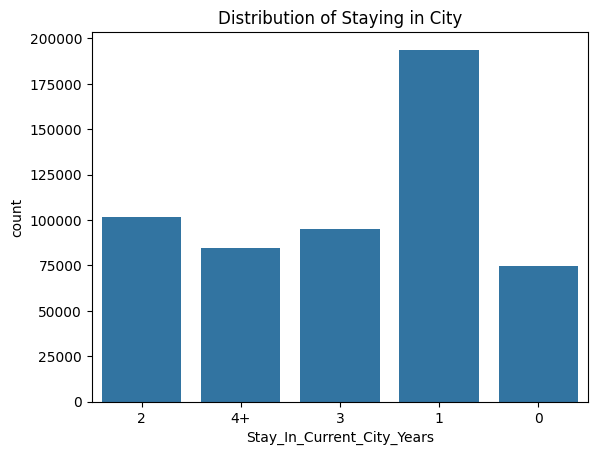

In [27]:
sns.countplot(x = data["Stay_In_Current_City_Years"])
plt.title("Distribution of Staying in City")

plt.show()

**Insight :**


*   Most of the customers are new to the area where they are staying for 1 year, hence Walmart attracts the new customers more.

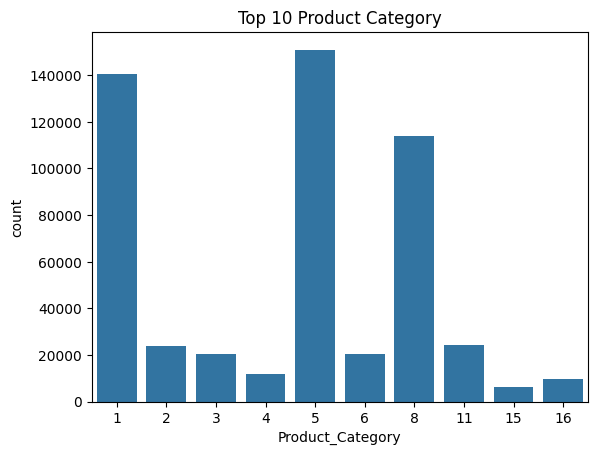

In [28]:
top_product_cat = data["Product_Category"].value_counts()[:10]
sns.barplot(x = top_product_cat.index , y = top_product_cat)
plt.title("Top 10 Product Category")

plt.show()

**Insight :**


*   Product Categories 5 , 1 and 8 had a very high sale and demand in the Black friday sale whereas the remaing categories were sold comparitively very less.

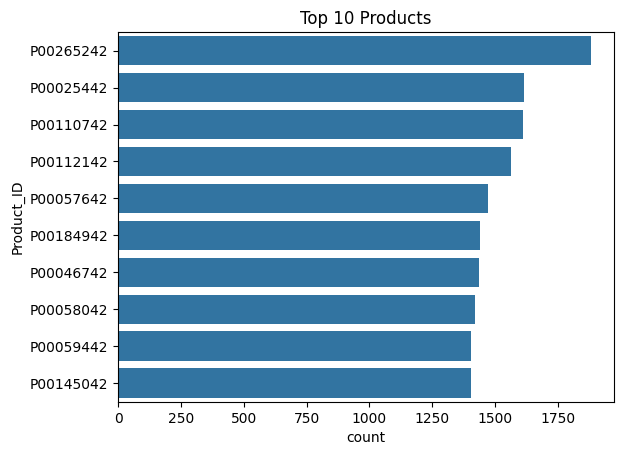

In [29]:
top_product_id = data["Product_ID"].value_counts()[:10]
sns.barplot(y = top_product_id.index , x = top_product_id )
plt.title("Top 10 Products")

plt.show()

**Insight :**


*   All the Top 10 products got sold almost equally with a very less difference.

*   However Product P00265242 is the most sold product.

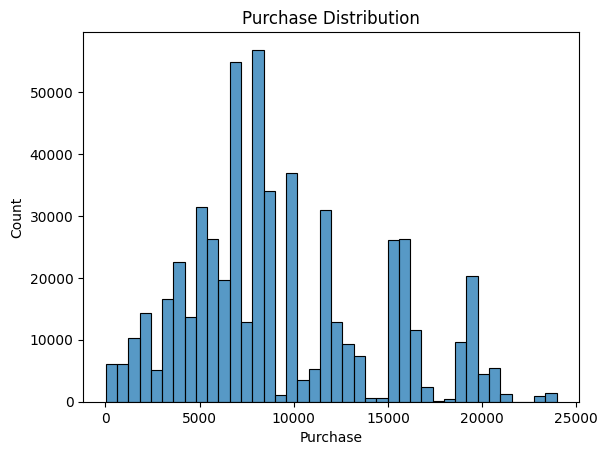

In [30]:
sns.histplot(x = "Purchase" , data = data , bins = 40)
plt.title("Purchase Distribution")

plt.show()

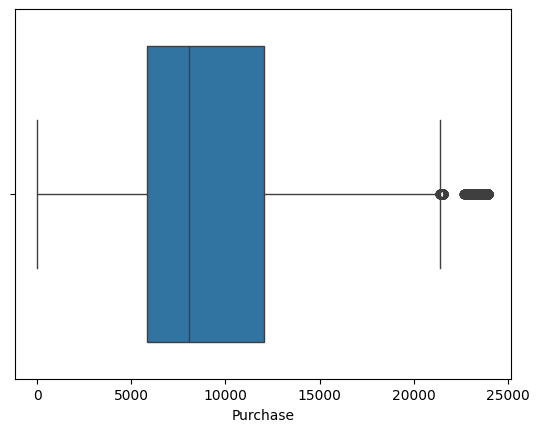

In [31]:
sns.boxplot(x = data["Purchase"])

plt.show()

**Insight :**


*   The above box plot specifies that the mean value for all the purchases made during the Black Friday sale is around 9000 with some outliers.

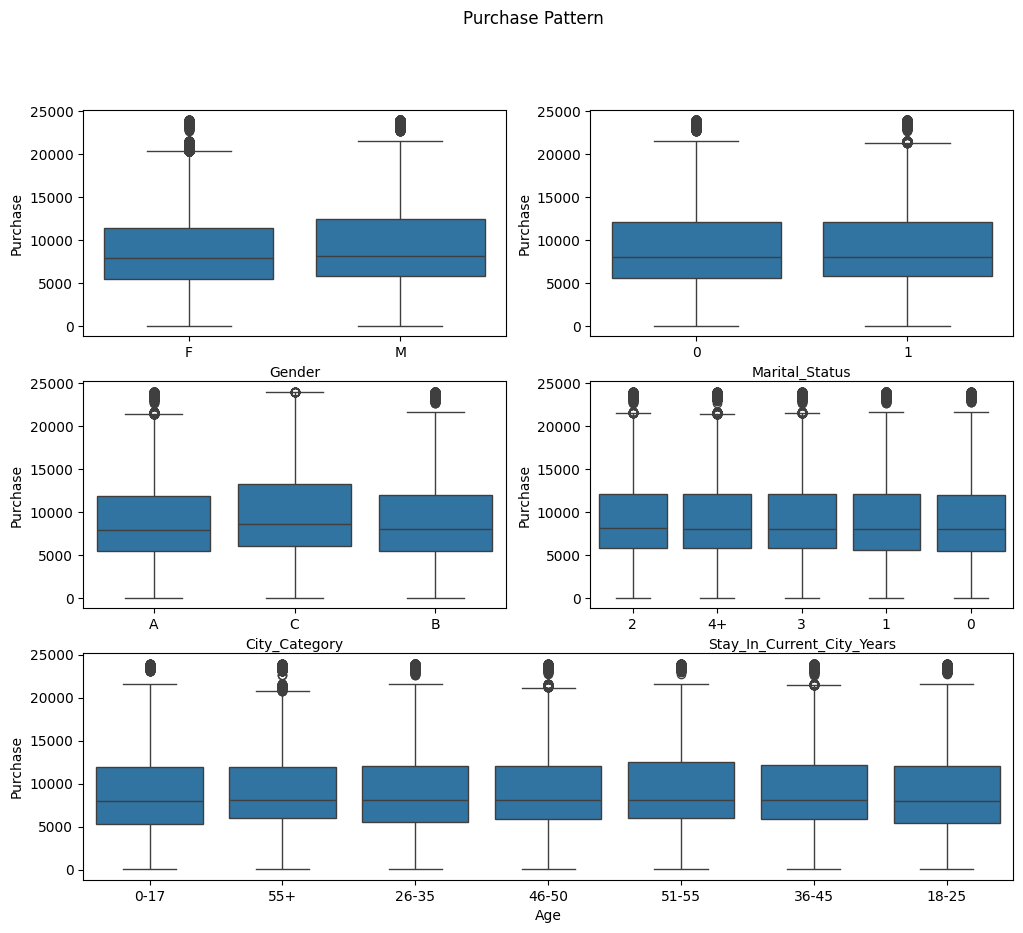

In [32]:
plt.figure(figsize = (12,10)).suptitle("Purchase Pattern")

plt.subplot(3,2,1)
sns.boxplot(x = "Gender" , y = "Purchase" , data = data)

plt.subplot(3,2,2)
sns.boxplot(x = "Marital_Status" , y = "Purchase" , data = data)

plt.subplot(3,2,3)
sns.boxplot(x = "City_Category" , y = "Purchase" , data = data)

plt.subplot(3,2,4)
sns.boxplot(x = "Stay_In_Current_City_Years" , y = "Purchase" , data = data)

plt.subplot(3,1,3)
sns.boxplot(x = "Age" , y = "Purchase" , data = data)

plt.show()

**Insight :**


*   By observing the Purchase pattern between Gender , Marital Status, City Category , City stayed in and Age  it is very clear that the Purchase mean almost stays the same in all category which is almost around 8000 to 9000.



---



# **Gender Vs Purchase Amount:**

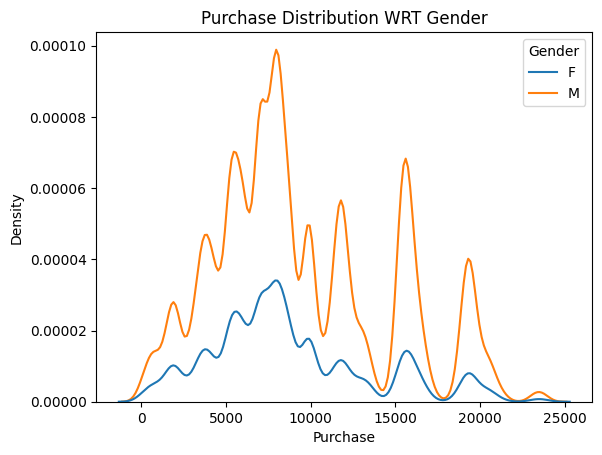

In [33]:
sns.kdeplot(x = "Purchase" , hue="Gender" , data = data)
plt.title("Purchase Distribution WRT Gender")

plt.show()

In [88]:
var = data . groupby("Gender")["Purchase"].agg(["sum","count"]).reset_index()
var["Gender"] = var["Gender"].replace({"F" : "Female" , "M" : "Male"})
var["Amt_Per_Purchase"] = round(var["sum"]/var["count"] , 2)
var

,Gender,sum,count,Amt_Per_Purchase
0,Female,1186232642,135809,8734.57
1,Male,3909580100,414259,9437.53


**Insight :**



*   The total amount spend by Male is almost 3 times greater than the amount spent by Female.
* From the above table we can see that the average amount spend per purchase by Male is higher than Female.  




In [35]:
dt_male = data.loc[data["Gender"]=="M", "Purchase"]
dt_female = data.loc[data["Gender"]=="F" , "Purchase"]

**Sample Size = 300**

In [36]:
sample_size = 300

male_mean = []
female_mean = []

for i in range(5000):
  male_sample = np.random.choice(dt_male , sample_size)
  female_sample = np.random.choice(dt_female , sample_size)

  m_mean = np.mean(male_sample)
  f_mean = np.mean(female_sample)

  male_mean.append(m_mean)
  female_mean.append(f_mean)

df_90_300 = pd.DataFrame({"male_mean" : male_mean , "female_mean" : female_mean})
df_90_300.head()

,male_mean,female_mean
0,9152.716667,8688.703333
1,9177.023333,8463.496667
2,9485.363333,8462.143333
3,9408.843333,9256.340000
4,8938.193333,8974.526667


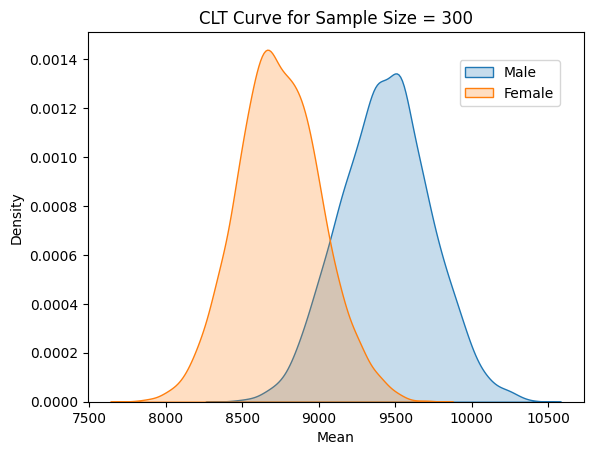

In [37]:
sns.kdeplot(x = df_90_300["male_mean"], fill = True , label = "Male")
sns.kdeplot(x = df_90_300["female_mean"], fill = True , label = "Female")
plt.legend(loc=(0.75,0.8))

plt.xlabel("Mean")
plt.title("CLT Curve for Sample Size = 300")

plt.show()

**Confidence Interval for 90%**

In [38]:
percent = 90
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_male = np.percentile(male_mean , [left_interval,right_interval]).round(0)
interval_female = np.percentile(female_mean , [left_interval,right_interval]).round(0)

print(f"90% Confidence Interval for  Male with Sample Size 300 is [{interval_male[0]} - {interval_male[1]}]")
print(f"Range = {interval_male[1] - interval_male[0]}")
print()
print(f"90% Confidence Interval for  Female with Sample Size 300 is [{interval_female[0]} - {interval_female[1]}]")
print(f"Range = {interval_female[1] - interval_female[0]}")

90% Confidence Interval for  Male with Sample Size 300 is [8948.0 - 9922.0]
Range = 974.0

90% Confidence Interval for  Female with Sample Size 300 is [8298.0 - 9199.0]
Range = 901.0


**Confidence Interval for 95%**

In [39]:
percent = 95
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_male = np.percentile(male_mean , [left_interval,right_interval]).round(0)
interval_female = np.percentile(female_mean , [left_interval,right_interval]).round(0)

print(f"95% Confidence Interval for  Male with Sample Size 300 is [{interval_male[0]} - {interval_male[1]}]")
print(f"Range = {interval_male[1] - interval_male[0]}")
print()
print(f"95% Confidence Interval for  Female with Sample Size 300 is [{interval_female[0]} - {interval_female[1]}]")
print(f"Range = {interval_female[1] - interval_female[0]}")

95% Confidence Interval for  Male with Sample Size 300 is [8863.0 - 10010.0]
Range = 1147.0

95% Confidence Interval for  Female with Sample Size 300 is [8216.0 - 9294.0]
Range = 1078.0


**Confidence Interval for 99%**

In [40]:
percent = 99
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_male = np.percentile(male_mean , [left_interval,right_interval]).round(0)
interval_female = np.percentile(female_mean , [left_interval,right_interval]).round(0)

print(f"99% Confidence Interval for  Male with Sample Size 300 is [{interval_male[0]} - {interval_male[1]}]")
print(f"Range = {interval_male[1] - interval_male[0]}")
print()
print(f"99% Confidence Interval for  Female with Sample Size 300 is [{interval_female[0]} - {interval_female[1]}]")
print(f"Range = {interval_female[1] - interval_female[0]}")

99% Confidence Interval for  Male with Sample Size 300 is [8686.0 - 10214.0]
Range = 1528.0

99% Confidence Interval for  Female with Sample Size 300 is [8053.0 - 9457.0]
Range = 1404.0


**Sample size = 3000**

In [41]:
sample_size = 3000

male_mean = []
female_mean = []

for i in range(5000):
  male_sample = np.random.choice(dt_male , sample_size)
  female_sample = np.random.choice(dt_female , sample_size)

  m_mean = np.mean(male_sample)
  f_mean = np.mean(female_sample)

  male_mean.append(m_mean)
  female_mean.append(f_mean)

df_90_3000 = pd.DataFrame({"male_mean" : male_mean , "female_mean" : female_mean})
df_90_3000.head()

,male_mean,female_mean
0,9264.163000,8569.972333
1,9341.568000,8869.975667
2,9268.110000,8777.965000
3,9420.633667,8684.167333
4,9465.189333,8782.804333


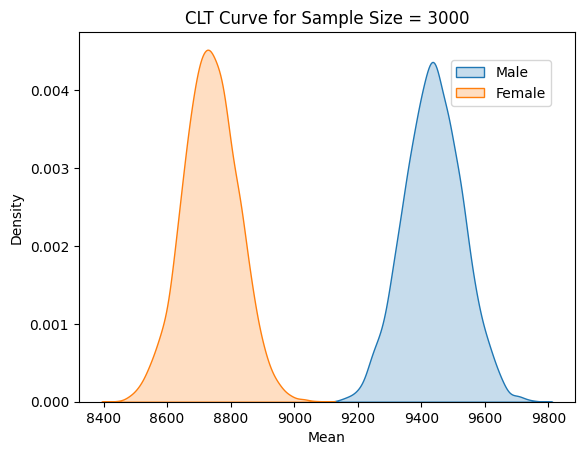

In [42]:
sns.kdeplot(x = df_90_3000["male_mean"], fill = True , label = "Male")
sns.kdeplot(x = df_90_3000["female_mean"], fill = True , label = "Female")
plt.legend(loc=(0.75,0.8))

plt.xlabel("Mean")
plt.title("CLT Curve for Sample Size = 3000")

plt.show()

**Confidence Interval for 90%**

In [43]:
percent = 90
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_male = np.percentile(male_mean , [left_interval,right_interval]).round(0)
interval_female = np.percentile(female_mean , [left_interval,right_interval]).round(0)

print(f"90% Confidence Interval for  Male with Sample Size 3000 is [{interval_male[0]} - {interval_male[1]}]")
print(f"Range = {interval_male[1] - interval_male[0]}")
print()
print(f"90% Confidence Interval for  Female with Sample Size 3000 is [{interval_female[0]} - {interval_female[1]}]")
print(f"Range = {interval_female[1] - interval_female[0]}")

90% Confidence Interval for  Male with Sample Size 3000 is [9284.0 - 9588.0]
Range = 304.0

90% Confidence Interval for  Female with Sample Size 3000 is [8592.0 - 8879.0]
Range = 287.0


**Confidence Interval for 95%**

In [44]:
percent = 95
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_male = np.percentile(male_mean , [left_interval,right_interval]).round(0)
interval_female = np.percentile(female_mean , [left_interval,right_interval]).round(0)

print(f"95% Confidence Interval for  Male with Sample Size 3000 is [{interval_male[0]} - {interval_male[1]}]")
print(f"Range = {interval_male[1] - interval_male[0]}")
print()
print(f"95% Confidence Interval for  Female with Sample Size 3000 is [{interval_female[0]} - {interval_female[1]}]")
print(f"Range = {interval_female[1] - interval_female[0]}")

95% Confidence Interval for  Male with Sample Size 3000 is [9255.0 - 9617.0]
Range = 362.0

95% Confidence Interval for  Female with Sample Size 3000 is [8564.0 - 8907.0]
Range = 343.0


**Confidence Interval for 99%**

In [45]:
percent = 99
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_male = np.percentile(male_mean , [left_interval,right_interval]).round(0)
interval_female = np.percentile(female_mean , [left_interval,right_interval]).round(0)

print(f"99% Confidence Interval for  Male with Sample Size 3000 is [{interval_male[0]} - {interval_male[1]}]")
print(f"Range = {interval_male[1] - interval_male[0]}")
print()
print(f"99% Confidence Interval for  Female with Sample Size 3000 is [{interval_female[0]} - {interval_female[1]}]")
print(f"Range = {interval_female[1] - interval_female[0]}")

99% Confidence Interval for  Male with Sample Size 3000 is [9207.0 - 9668.0]
Range = 461.0

99% Confidence Interval for  Female with Sample Size 3000 is [8514.0 - 8963.0]
Range = 449.0


**Sample size = 30,000**

In [46]:
sample_size = 30000

male_mean = []
female_mean = []

for i in range(5000):
  male_sample = np.random.choice(dt_male , sample_size)
  female_sample = np.random.choice(dt_female , sample_size)

  m_mean = np.mean(male_sample)
  f_mean = np.mean(female_sample)

  male_mean.append(m_mean)
  female_mean.append(f_mean)

df_90_30000 = pd.DataFrame({"male_mean" : male_mean , "female_mean" : female_mean})
df_90_30000.head()

,male_mean,female_mean
0,9420.193567,8733.382367
1,9408.529967,8732.975733
2,9417.139567,8786.832700
3,9434.607867,8734.412400
4,9424.207667,8759.065167


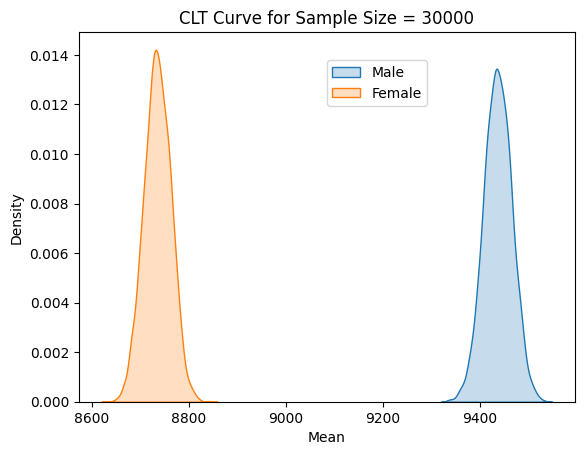

In [47]:
sns.kdeplot(x = df_90_30000["male_mean"], fill = True , label = "Male")
sns.kdeplot(x = df_90_30000["female_mean"], fill = True , label = "Female")
plt.legend(loc=(0.5,0.8))

plt.xlabel("Mean")
plt.title("CLT Curve for Sample Size = 30000")

plt.show()

**Confidence Interval for 90%**

In [48]:
percent = 90
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_male = np.percentile(male_mean , [left_interval,right_interval]).round(0)
interval_female = np.percentile(female_mean , [left_interval,right_interval]).round(0)

print(f"99% Confidence Interval for  Male with Sample Size 30000 is [{interval_male[0]} - {interval_male[1]}]")
print(f"Range = {interval_male[1] - interval_male[0]}")
print()
print(f"99% Confidence Interval for  Female with Sample Size 30000 is [{interval_female[0]} - {interval_female[1]}]")
print(f"Range = {interval_female[1] - interval_female[0]}")

99% Confidence Interval for  Male with Sample Size 30000 is [9389.0 - 9485.0]
Range = 96.0

99% Confidence Interval for  Female with Sample Size 30000 is [8688.0 - 8780.0]
Range = 92.0


**Confidence Interval for 95%**

In [49]:
percent = 95
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_male = np.percentile(male_mean , [left_interval,right_interval]).round(0)
interval_female = np.percentile(female_mean , [left_interval,right_interval]).round(0)

print(f"99% Confidence Interval for  Male with Sample Size 30000 is [{interval_male[0]} - {interval_male[1]}]")
print(f"Range = {interval_male[1] - interval_male[0]}")
print()
print(f"99% Confidence Interval for  Female with Sample Size 30000 is [{interval_female[0]} - {interval_female[1]}]")
print(f"Range = {interval_female[1] - interval_female[0]}")

99% Confidence Interval for  Male with Sample Size 30000 is [9380.0 - 9493.0]
Range = 113.0

99% Confidence Interval for  Female with Sample Size 30000 is [8680.0 - 8788.0]
Range = 108.0


**Confidence Interval for 99%**

In [50]:
percent = 99
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_male = np.percentile(male_mean , [left_interval,right_interval]).round(0)
interval_female = np.percentile(female_mean , [left_interval,right_interval]).round(0)

print(f"99% Confidence Interval for  Male with Sample Size 30000 is [{interval_male[0]} - {interval_male[1]}]")
print(f"Range = {interval_male[1] - interval_male[0]}")
print()
print(f"99% Confidence Interval for  Female with Sample Size 30000 is [{interval_female[0]} - {interval_female[1]}]")
print(f"Range = {interval_female[1] - interval_female[0]}")

99% Confidence Interval for  Male with Sample Size 30000 is [9360.0 - 9512.0]
Range = 152.0

99% Confidence Interval for  Female with Sample Size 30000 is [8665.0 - 8806.0]
Range = 141.0


**Insight :**



*   As the size of the sample increases the confidence interval is becoming more clear and accurate. Hence, more the sample size more precise is the data.
*   From the above graphs its clear that as the sample size increases the CLT curves are not overlapping there by indicating a huge difference in the spending of amount by Male and Female.

*   It is very clear that Male spent more money in comparison with Female in the Black Friday Sale.







---



# **Martital Status vs Purchase**

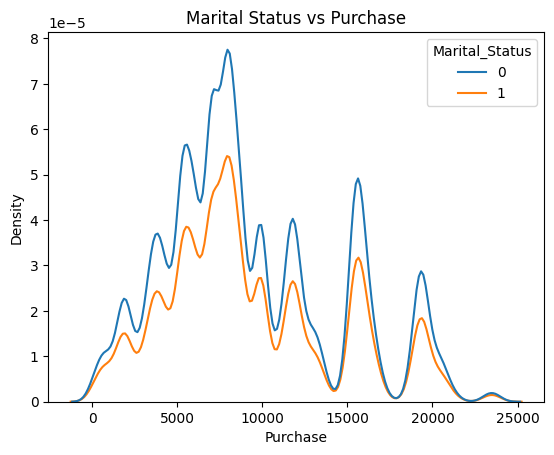

In [51]:
sns.kdeplot(x = "Purchase" , hue = "Marital_Status" , data = data)
plt.title("Marital Status vs Purchase")

plt.show()

In [52]:
data_s = data.groupby("Marital_Status")["Purchase"].agg(["sum","count"]).reset_index()
data_s["Purchase Per Status"] = round(data_s["sum"]/data_s["count"],2)
data_s["Marital_Status"] = data_s["Marital_Status"].replace({0 : "Unmarried" , 1 : "Married"})

data_s

,Marital_Status,sum,count,Purchase Per Status
0,Unmarried,3008927447,324731,9265.91
1,Married,2086885295,225337,9261.17


**Insight :**



*   From the above table we can clearly see that the average amount spend per transaction by both Married and Unmarried is almost same.

*   However the total amount spend and the Purchase made by Unmarried people is much higher than the Married.




In [53]:
dt_married = data.loc[data["Marital_Status"]==1,"Purchase"]
dt_unmarried = data.loc[data["Marital_Status"]==0,"Purchase"]

**Sample Size = 300**

In [54]:
sample_size = 300

married_mean = []
unmarried_mean = []

for i in range(5000):
  married_sample = np.random.choice(dt_married , sample_size)
  unmarried_sample = np.random.choice(dt_unmarried , sample_size)

  married_sample_mean = np.mean(married_sample)
  unmarried_sample_mean = np.mean(unmarried_sample)

  married_mean.append(married_sample_mean)
  unmarried_mean.append(unmarried_sample_mean)

df_300 = pd.DataFrame({"Married_mean" : married_mean , "Unmarried_mean" : unmarried_mean})
df_300.head()


,Married_mean,Unmarried_mean
0,9648.486667,9332.713333
1,9166.073333,8940.216667
2,9474.590000,9204.613333
3,8895.196667,9184.480000
4,9047.270000,9362.970000


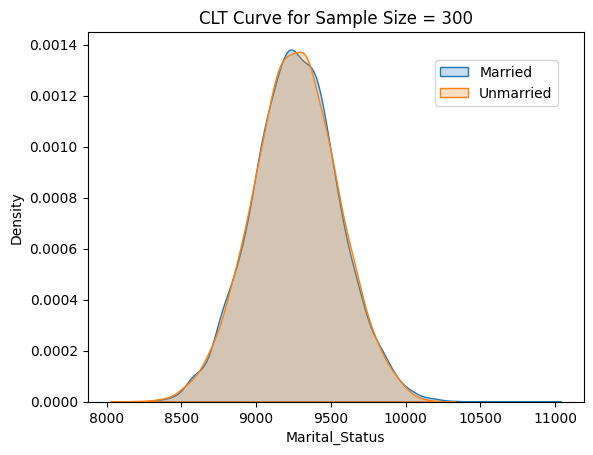

In [55]:
sns.kdeplot(df_300["Married_mean"] , fill = True , label = "Married")
sns.kdeplot(df_300["Unmarried_mean"] , fill = True , label = "Unmarried")
plt.legend(loc = (0.7 , 0.8))

plt.xlabel("Marital_Status")

plt.title("CLT Curve for Sample Size = 300")
plt.show()

**Confidence Interval for 90%**

In [56]:
percent  = 90
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_married = np.percentile(married_mean , [left_interval , right_interval]).round(0)
interval_unmarried = np.percentile(unmarried_mean , [left_interval , right_interval]).round(0)

print(f"90% Confidence Interval for  Married people with Sample Size 300 is [{interval_married[0]} - {interval_married[1]}]")
print(f"Range = {interval_married[1] - interval_married[0]}")
print()
print(f"90% Confidence Interval for Unmarried people with Sample Size 300 is [{interval_unmarried[0]} - {interval_unmarried[1]}]")
print(f"Range = {interval_unmarried[1] - interval_unmarried[0]}")

90% Confidence Interval for  Married people with Sample Size 300 is [8786.0 - 9738.0]
Range = 952.0

90% Confidence Interval for Unmarried people with Sample Size 300 is [8793.0 - 9731.0]
Range = 938.0


**Confidence Interval for 95%**

In [57]:
percent  = 95
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_married = np.percentile(married_mean , [left_interval , right_interval]).round(0)
interval_unmarried = np.percentile(unmarried_mean , [left_interval , right_interval]).round(0)

print(f"95% Confidence Interval for  Married people with Sample Size 300 is [{interval_married[0]} - {interval_married[1]}]")
print(f"Range = {interval_married[1] - interval_married[0]}")
print()
print(f"95% Confidence Interval for Unmarried people with Sample Size 300 is [{interval_unmarried[0]} - {interval_unmarried[1]}]")
print(f"Range = {interval_unmarried[1] - interval_unmarried[0]}")

95% Confidence Interval for  Married people with Sample Size 300 is [8707.0 - 9841.0]
Range = 1134.0

95% Confidence Interval for Unmarried people with Sample Size 300 is [8697.0 - 9821.0]
Range = 1124.0


**Confidence Interval for 99%**

In [58]:
percent  = 99
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_married = np.percentile(married_mean , [left_interval , right_interval]).round(0)
interval_unmarried = np.percentile(unmarried_mean , [left_interval , right_interval]).round(0)

print(f"99% Confidence Interval for  Married people with Sample Size 300 is [{interval_married[0]} - {interval_married[1]}]")
print(f"Range = {interval_married[1] - interval_married[0]}")
print()
print(f"99% Confidence Interval for Unmarried people with Sample Size 300 is [{interval_unmarried[0]} - {interval_unmarried[1]}]")
print(f"Range = {interval_unmarried[1] - interval_unmarried[0]}")

99% Confidence Interval for  Married people with Sample Size 300 is [8552.0 - 10019.0]
Range = 1467.0

99% Confidence Interval for Unmarried people with Sample Size 300 is [8523.0 - 9966.0]
Range = 1443.0


**Sample Size = 3000**

In [59]:
sample_size = 3000

mean_married = []
mean_unmarried = []

for i in range(5000):
  married_sample = np.random.choice(dt_married , sample_size)
  unmarried_sample = np.random.choice(dt_unmarried , sample_size)

  married_sample_mean = np.mean(married_sample)
  unmarried_sample_mean = np.mean(unmarried_sample)

  married_mean.append(married_sample_mean)
  unmarried_mean.append(unmarried_sample_mean)

df_3000 = pd.DataFrame({"Married_mean" : married_mean , "Unmarried_mean" : unmarried_mean})
df_3000.head()


,Married_mean,Unmarried_mean
0,9648.486667,9332.713333
1,9166.073333,8940.216667
2,9474.590000,9204.613333
3,8895.196667,9184.480000
4,9047.270000,9362.970000


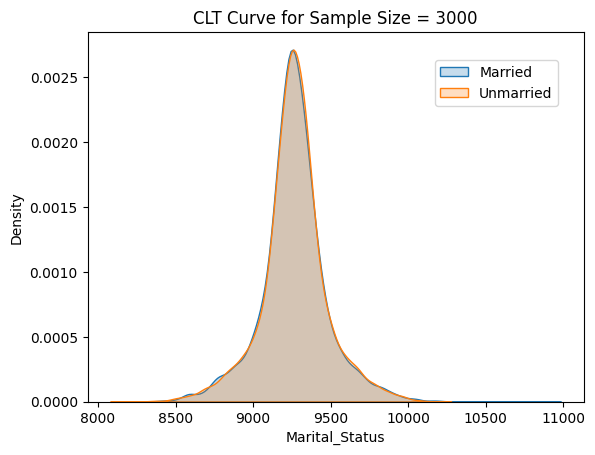

In [60]:
sns.kdeplot(df_3000["Married_mean"] , fill = True , label = "Married")
sns.kdeplot(df_3000["Unmarried_mean"] , fill = True , label = "Unmarried")
plt.legend(loc = (0.7 , 0.8))

plt.xlabel("Marital_Status")

plt.title("CLT Curve for Sample Size = 3000")
plt.show()

**Confidence Interval for 90%**

In [61]:
percent  = 90
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_married = np.percentile(married_mean , [left_interval , right_interval]).round(0)
interval_unmarried = np.percentile(unmarried_mean , [left_interval , right_interval]).round(0)

print(f"90% Confidence Interval for  Married people with Sample Size 3000 is [{interval_married[0]} - {interval_married[1]}]")
print(f"Range = {interval_married[1] - interval_married[0]}")
print()
print(f"90% Confidence Interval for Unmarried people with Sample Size 3000 is [{interval_unmarried[0]} - {interval_unmarried[1]}]")
print(f"Range = {interval_unmarried[1] - interval_unmarried[0]}")

90% Confidence Interval for  Married people with Sample Size 3000 is [8893.0 - 9633.0]
Range = 740.0

90% Confidence Interval for Unmarried people with Sample Size 3000 is [8895.0 - 9630.0]
Range = 735.0


**Confidence Interval for 95%**

In [62]:
percent  = 95
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_married = np.percentile(married_mean , [left_interval , right_interval]).round(0)
interval_unmarried = np.percentile(unmarried_mean , [left_interval , right_interval]).round(0)

print(f"95% Confidence Interval for  Married people with Sample Size 3000 is [{interval_married[0]} - {interval_married[1]}]")
print(f"Range = {interval_married[1] - interval_married[0]}")
print()
print(f"95% Confidence Interval for Unmarried people with Sample Size 3000 is [{interval_unmarried[0]} - {interval_unmarried[1]}]")
print(f"Range = {interval_unmarried[1] - interval_unmarried[0]}")

95% Confidence Interval for  Married people with Sample Size 3000 is [8786.0 - 9738.0]
Range = 952.0

95% Confidence Interval for Unmarried people with Sample Size 3000 is [8793.0 - 9731.0]
Range = 938.0


**Confidence Interval for 99%**

In [63]:
percent  = 99
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_married = np.percentile(married_mean , [left_interval , right_interval]).round(0)
interval_unmarried = np.percentile(unmarried_mean , [left_interval , right_interval]).round(0)

print(f"99% Confidence Interval for  Married people with Sample Size 3000 is [{interval_married[0]} - {interval_married[1]}]")
print(f"Range = {interval_married[1] - interval_married[0]}")
print()
print(f"99% Confidence Interval for Unmarried people with Sample Size 3000 is [{interval_unmarried[0]} - {interval_unmarried[1]}]")
print(f"Range = {interval_unmarried[1] - interval_unmarried[0]}")

99% Confidence Interval for  Married people with Sample Size 3000 is [8590.0 - 9943.0]
Range = 1353.0

99% Confidence Interval for Unmarried people with Sample Size 3000 is [8593.0 - 9921.0]
Range = 1328.0


**Sample Size = 30000**

In [64]:
sample_size = 30000

mean_married = []
mean_unmarried = []

for i in range(5000):
  married_sample = np.random.choice(dt_married , sample_size)
  unmarried_sample = np.random.choice(dt_unmarried , sample_size)

  married_sample_mean = np.mean(married_sample)
  unmarried_sample_mean = np.mean(unmarried_sample)

  married_mean.append(married_sample_mean)
  unmarried_mean.append(unmarried_sample_mean)

df_30000 = pd.DataFrame({"Married_mean" : married_mean , "Unmarried_mean" : unmarried_mean})
df_30000.head()


,Married_mean,Unmarried_mean
0,9648.486667,9332.713333
1,9166.073333,8940.216667
2,9474.590000,9204.613333
3,8895.196667,9184.480000
4,9047.270000,9362.970000


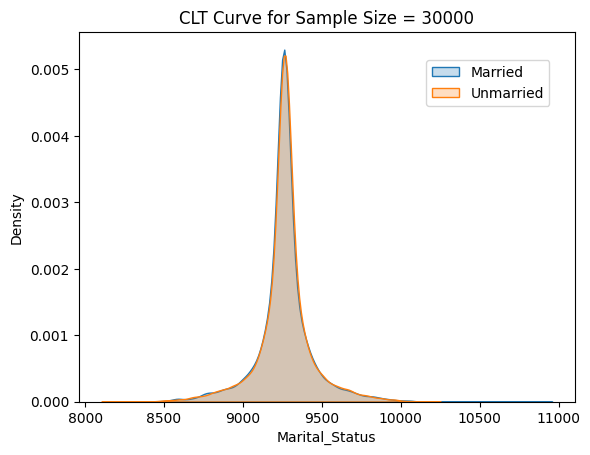

In [65]:
sns.kdeplot(df_30000["Married_mean"] , fill = True , label = "Married")
sns.kdeplot(df_30000["Unmarried_mean"] , fill = True , label = "Unmarried")
plt.legend(loc = (0.7 , 0.8))

plt.xlabel("Marital_Status")

plt.title("CLT Curve for Sample Size = 30000")
plt.show()

**Confidence Interval for 90%**

In [66]:
percent  = 90
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_married = np.percentile(married_mean , [left_interval , right_interval]).round(0)
interval_unmarried = np.percentile(unmarried_mean , [left_interval , right_interval]).round(0)

print(f"90% Confidence Interval for  Married people with Sample Size 30000 is [{interval_married[0]} - {interval_married[1]}]")
print(f"Range = {interval_married[1] - interval_married[0]}")
print()
print(f"90% Confidence Interval for Unmarried people with Sample Size 30000 is [{interval_unmarried[0]} - {interval_unmarried[1]}]")
print(f"Range = {interval_unmarried[1] - interval_unmarried[0]}")

90% Confidence Interval for  Married people with Sample Size 30000 is [8969.0 - 9555.0]
Range = 586.0

90% Confidence Interval for Unmarried people with Sample Size 30000 is [8967.0 - 9560.0]
Range = 593.0


**Confidence Interval for 95%**

In [67]:
percent  = 95
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_married = np.percentile(married_mean , [left_interval , right_interval]).round(0)
interval_unmarried = np.percentile(unmarried_mean , [left_interval , right_interval]).round(0)

print(f"95% Confidence Interval for  Married people with Sample Size 30000 is [{interval_married[0]} - {interval_married[1]}]")
print(f"Range = {interval_married[1] - interval_married[0]}")
print()
print(f"95% Confidence Interval for Unmarried people with Sample Size 30000 is [{interval_unmarried[0]} - {interval_unmarried[1]}]")
print(f"Range = {interval_unmarried[1] - interval_unmarried[0]}")

95% Confidence Interval for  Married people with Sample Size 30000 is [8846.0 - 9676.0]
Range = 830.0

95% Confidence Interval for Unmarried people with Sample Size 30000 is [8852.0 - 9673.0]
Range = 821.0


**Confidence Interval for 99%**

In [68]:
percent  = 99
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_married = np.percentile(married_mean , [left_interval , right_interval]).round(0)
interval_unmarried = np.percentile(unmarried_mean , [left_interval , right_interval]).round(0)

print(f"99% Confidence Interval for  Married people with Sample Size 30000 is [{interval_married[0]} - {interval_married[1]}]")
print(f"Range = {interval_married[1] - interval_married[0]}")
print()
print(f"99% Confidence Interval for Unmarried people with Sample Size 30000 is [{interval_unmarried[0]} - {interval_unmarried[1]}]")
print(f"Range = {interval_unmarried[1] - interval_unmarried[0]}")

99% Confidence Interval for  Married people with Sample Size 30000 is [8634.0 - 9897.0]
Range = 1263.0

99% Confidence Interval for Unmarried people with Sample Size 30000 is [8635.0 - 9880.0]
Range = 1245.0


**Insight :**


*   As the size of the sample increases the confidence interval is becoming more clear and accurate. Hence, more the sample size more precise is the data.
*   From the above graphs its clear that as the sample size increases the CLT curves are overlapping there by indicating the amount spent by both Married and Unmarried people are almost same.
  
*   Hence both Married and Unmarried people had equal contribution in the Black Friday Sale.







---



# **Age vs Purchase**

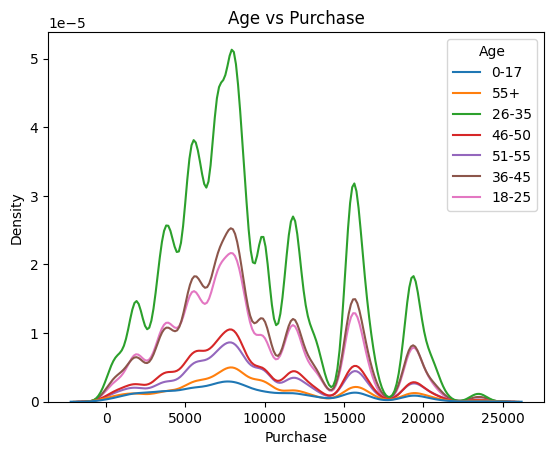

In [69]:
sns.kdeplot(x = "Purchase" , hue = "Age" , data = data)

plt.title("Age vs Purchase")
plt.show()

In [70]:
temp_age = data.groupby("Age")["Purchase"].agg(["sum","count"]).reset_index()
temp_age["Purchase_per_Age"] = np.round(temp_age["sum"]/temp_age["count"],2)
temp_age

,Age,sum,count,Purchase_per_Age
0,0-17,134913183,15102,8933.46
1,18-25,913848675,99660,9169.66
2,26-35,2031770578,219587,9252.69
3,36-45,1026569884,110013,9331.35
4,46-50,420843403,45701,9208.63
5,51-55,367099644,38501,9534.81
6,55+,200767375,21504,9336.28


**Insight :**



*   Age group from 26 - 45 has the major contribution tot he purchase made in the sale.
*   Still as per the amount per transaction is almost same for all the age groups where 0 -17 has the least purchase whereas 51 - 55 has the most purchase.



In [71]:
dt_0_17 = data.loc[data["Age"]=="0-17","Purchase"]
dt_18_25 = data.loc[data["Age"]=="18-25","Purchase"]
dt_26_35 = data.loc[data["Age"]=="26-35","Purchase"]
dt_36_45 = data.loc[data["Age"]=="36-45","Purchase"]
dt_46_50 = data.loc[data["Age"]=="46-50","Purchase"]
dt_51_55 = data.loc[data["Age"]=="51-55","Purchase"]
dt_55 = data.loc[data["Age"]=="55+","Purchase"]


**Sample Size = 300**

In [72]:
sample_size = 300

mean_0_17 = []
mean_18_25 = []
mean_26_35 = []
mean_36_45 = []
mean_46_50 = []
mean_51_55 = []
mean_55 = []

for i in range(5000):
  sample_17 = np.random.choice(dt_0_17 , sample_size)
  sample_25 = np.random.choice(dt_18_25 , sample_size)
  sample_35 = np.random.choice(dt_26_35 , sample_size)
  sample_45 = np.random.choice(dt_36_45 , sample_size)
  sample_50 = np.random.choice(dt_46_50 , sample_size)
  sample_55 = np.random.choice(dt_51_55 , sample_size)
  sample_56 = np.random.choice(dt_55 , sample_size)

  sample_mean_17 = np.mean(sample_17)
  sample_mean_25 = np.mean(sample_25)
  sample_mean_35 = np.mean(sample_35)
  sample_mean_45 = np.mean(sample_45)
  sample_mean_50 = np.mean(sample_50)
  sample_mean_55 = np.mean(sample_55)
  sample_mean_56 = np.mean(sample_56)

  mean_0_17.append(sample_mean_17)
  mean_18_25.append(sample_mean_25)
  mean_26_35.append(sample_mean_35)
  mean_36_45.append(sample_mean_45)
  mean_46_50.append(sample_mean_50)
  mean_51_55.append(sample_mean_55)
  mean_55.append(sample_mean_56)

df_300 = pd.DataFrame({"0-17" : mean_0_17 , "18-25" : mean_18_25 ,"26-35" : mean_26_35 ,"36-45" : mean_36_45 ,"46-50" : mean_46_50 ,"51-55" : mean_51_55 ,"55+" : mean_55 ,})
df_300.head()


,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,9764.646667,8987.250000,9389.456667,9511.370000,9645.320000,8994.763333,9387.053333
1,9048.710000,8936.996667,9203.400000,9910.556667,9731.003333,9663.170000,9469.976667
2,9337.380000,8798.350000,9673.706667,9316.186667,9756.430000,9380.230000,8782.866667
3,8398.983333,9317.833333,8893.780000,9411.373333,9135.843333,9453.246667,9331.743333
4,9012.163333,9032.513333,9511.566667,8553.773333,9509.530000,9079.936667,9322.836667


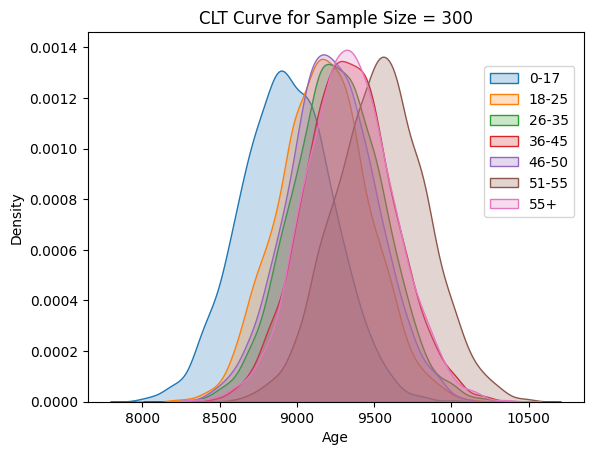

In [73]:
sns.kdeplot(df_300["0-17"] , fill = True , label = "0-17")
sns.kdeplot(df_300["18-25"] , fill = True , label = "18-25")
sns.kdeplot(df_300["26-35"] , fill = True , label = "26-35")
sns.kdeplot(df_300["36-45"] , fill = True , label = "36-45")
sns.kdeplot(df_300["46-50"] , fill = True , label = "46-50")
sns.kdeplot(df_300["51-55"] , fill = True , label = "51-55")
sns.kdeplot(df_300["55+"] , fill = True , label = "55+")
plt.legend(loc = (0.8 , 0.5))

plt.xlabel("Age")

plt.title("CLT Curve for Sample Size = 300")
plt.show()

**Confidence Interval for 90%**

In [74]:
percent  = 90
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_age_17 = np.percentile(mean_0_17 , [left_interval , right_interval]).round(0)
interval_age_25 = np.percentile(mean_18_25 , [left_interval , right_interval]).round(0)
interval_age_35 = np.percentile(mean_26_35 , [left_interval , right_interval]).round(0)
interval_age_45 = np.percentile(mean_36_45 , [left_interval , right_interval]).round(0)
interval_age_50 = np.percentile(mean_46_50 , [left_interval , right_interval]).round(0)
interval_age_55 = np.percentile(mean_51_55 , [left_interval , right_interval]).round(0)
interval_age_56 = np.percentile(mean_55 , [left_interval , right_interval]).round(0)

print(f"90% Confidence Interval for people with age 0 - 17 and Sample Size 300 is [{interval_age_17[0]} - {interval_age_17[1]}]")
print(f"Range = {interval_age_17[1] - interval_age_17[0]}")
print()
print(f"90% Confidence Interval for people with age 18 - 25 and Sample Size 300 is [{interval_age_25[0]} - {interval_age_25[1]}]")
print(f"Range = {interval_age_25[1] - interval_age_25[0]}")
print()
print(f"90% Confidence Interval for people with age 26 - 35 and Sample Size 300 is [{interval_age_35[0]} - {interval_age_35[1]}]")
print(f"Range = {interval_age_35[1] - interval_age_35[0]}")
print()
print(f"90% Confidence Interval for people with age 36 - 45 and Sample Size 300 is [{interval_age_45[0]} - {interval_age_45[1]}]")
print(f"Range = {interval_age_45[1] - interval_age_45[0]}")
print()
print(f"90% Confidence Interval for people with age 46 - 50 and Sample Size 300 is [{interval_age_50[0]} - {interval_age_50[1]}]")
print(f"Range = {interval_age_50[1] - interval_age_50[0]}")
print()
print(f"90% Confidence Interval for people with age 51 - 55 and Sample Size 300 is [{interval_age_55[0]} - {interval_age_55[1]}]")
print(f"Range = {interval_age_55[1] - interval_age_55[0]}")
print()
print(f"90% Confidence Interval for people with age 55+ and Sample Size 300 is [{interval_age_56[0]} - {interval_age_56[1]}]")
print(f"Range = {interval_age_56[1] - interval_age_56[0]}")


90% Confidence Interval for people with age 0 - 17 and Sample Size 300 is [8441.0 - 9423.0]
Range = 982.0

90% Confidence Interval for people with age 18 - 25 and Sample Size 300 is [8696.0 - 9648.0]
Range = 952.0

90% Confidence Interval for people with age 26 - 35 and Sample Size 300 is [8788.0 - 9739.0]
Range = 951.0

90% Confidence Interval for people with age 36 - 45 and Sample Size 300 is [8864.0 - 9824.0]
Range = 960.0

90% Confidence Interval for people with age 46 - 50 and Sample Size 300 is [8757.0 - 9701.0]
Range = 944.0

90% Confidence Interval for people with age 51 - 55 and Sample Size 300 is [9059.0 - 10024.0]
Range = 965.0

90% Confidence Interval for people with age 55+ and Sample Size 300 is [8883.0 - 9825.0]
Range = 942.0


**Confidence Interval for 95%**

In [75]:
percent  = 95
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_age_17 = np.percentile(mean_0_17 , [left_interval , right_interval]).round(0)
interval_age_25 = np.percentile(mean_18_25 , [left_interval , right_interval]).round(0)
interval_age_35 = np.percentile(mean_26_35 , [left_interval , right_interval]).round(0)
interval_age_45 = np.percentile(mean_36_45 , [left_interval , right_interval]).round(0)
interval_age_50 = np.percentile(mean_46_50 , [left_interval , right_interval]).round(0)
interval_age_55 = np.percentile(mean_51_55 , [left_interval , right_interval]).round(0)
interval_age_56 = np.percentile(mean_55 , [left_interval , right_interval]).round(0)

print(f"95% Confidence Interval for people with age 0 - 17 and Sample Size 300 is [{interval_age_17[0]} - {interval_age_17[1]}]")
print(f"Range = {interval_age_17[1] - interval_age_17[0]}")
print()
print(f"95% Confidence Interval for people with age 18 - 25 and Sample Size 300 is [{interval_age_25[0]} - {interval_age_25[1]}]")
print(f"Range = {interval_age_25[1] - interval_age_25[0]}")
print()
print(f"95% Confidence Interval for people with age 26 - 35 and Sample Size 300 is [{interval_age_35[0]} - {interval_age_35[1]}]")
print(f"Range = {interval_age_35[1] - interval_age_35[0]}")
print()
print(f"95% Confidence Interval for people with age 36 - 45 and Sample Size 300 is [{interval_age_45[0]} - {interval_age_45[1]}]")
print(f"Range = {interval_age_45[1] - interval_age_45[0]}")
print()
print(f"95% Confidence Interval for people with age 46 - 50 and Sample Size 300 is [{interval_age_50[0]} - {interval_age_50[1]}]")
print(f"Range = {interval_age_50[1] - interval_age_50[0]}")
print()
print(f"95% Confidence Interval for people with age 51 - 55 and Sample Size 300 is [{interval_age_55[0]} - {interval_age_55[1]}]")
print(f"Range = {interval_age_55[1] - interval_age_55[0]}")
print()
print(f"95% Confidence Interval for people with age 55+ and Sample Size 300 is [{interval_age_56[0]} - {interval_age_56[1]}]")
print(f"Range = {interval_age_56[1] - interval_age_56[0]}")


95% Confidence Interval for people with age 0 - 17 and Sample Size 300 is [8360.0 - 9515.0]
Range = 1155.0

95% Confidence Interval for people with age 18 - 25 and Sample Size 300 is [8621.0 - 9751.0]
Range = 1130.0

95% Confidence Interval for people with age 26 - 35 and Sample Size 300 is [8694.0 - 9834.0]
Range = 1140.0

95% Confidence Interval for people with age 36 - 45 and Sample Size 300 is [8783.0 - 9912.0]
Range = 1129.0

95% Confidence Interval for people with age 46 - 50 and Sample Size 300 is [8664.0 - 9790.0]
Range = 1126.0

95% Confidence Interval for people with age 51 - 55 and Sample Size 300 is [8966.0 - 10120.0]
Range = 1154.0

95% Confidence Interval for people with age 55+ and Sample Size 300 is [8779.0 - 9915.0]
Range = 1136.0


**Confidence Interval for 99%**

In [76]:
percent  = 99
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_age_17 = np.percentile(mean_0_17 , [left_interval , right_interval]).round(0)
interval_age_25 = np.percentile(mean_18_25 , [left_interval , right_interval]).round(0)
interval_age_35 = np.percentile(mean_26_35 , [left_interval , right_interval]).round(0)
interval_age_45 = np.percentile(mean_36_45 , [left_interval , right_interval]).round(0)
interval_age_50 = np.percentile(mean_46_50 , [left_interval , right_interval]).round(0)
interval_age_55 = np.percentile(mean_51_55 , [left_interval , right_interval]).round(0)
interval_age_56 = np.percentile(mean_55 , [left_interval , right_interval]).round(0)

print(f"99% Confidence Interval for people with age 0 - 17 and Sample Size 300 is [{interval_age_17[0]} - {interval_age_17[1]}]")
print(f"Range = {interval_age_17[1] - interval_age_17[0]}")
print()
print(f"99% Confidence Interval for people with age 18 - 25 and Sample Size 300 is [{interval_age_25[0]} - {interval_age_25[1]}]")
print(f"Range = {interval_age_25[1] - interval_age_25[0]}")
print()
print(f"99% Confidence Interval for people with age 26 - 35 and Sample Size 300 is [{interval_age_35[0]} - {interval_age_35[1]}]")
print(f"Range = {interval_age_35[1] - interval_age_35[0]}")
print()
print(f"99% Confidence Interval for people with age 36 - 45 and Sample Size 300 is [{interval_age_45[0]} - {interval_age_45[1]}]")
print(f"Range = {interval_age_45[1] - interval_age_45[0]}")
print()
print(f"99% Confidence Interval for people with age 46 - 50 and Sample Size 300 is [{interval_age_50[0]} - {interval_age_50[1]}]")
print(f"Range = {interval_age_50[1] - interval_age_50[0]}")
print()
print(f"99% Confidence Interval for people with age 51 - 55 and Sample Size 300 is [{interval_age_55[0]} - {interval_age_55[1]}]")
print(f"Range = {interval_age_55[1] - interval_age_55[0]}")
print()
print(f"99% Confidence Interval for people with age 55+ and Sample Size 300 is [{interval_age_56[0]} - {interval_age_56[1]}]")
print(f"Range = {interval_age_56[1] - interval_age_56[0]}")


99% Confidence Interval for people with age 0 - 17 and Sample Size 300 is [8168.0 - 9710.0]
Range = 1542.0

99% Confidence Interval for people with age 18 - 25 and Sample Size 300 is [8448.0 - 9942.0]
Range = 1494.0

99% Confidence Interval for people with age 26 - 35 and Sample Size 300 is [8528.0 - 10033.0]
Range = 1505.0

99% Confidence Interval for people with age 36 - 45 and Sample Size 300 is [8614.0 - 10081.0]
Range = 1467.0

99% Confidence Interval for people with age 46 - 50 and Sample Size 300 is [8504.0 - 9936.0]
Range = 1432.0

99% Confidence Interval for people with age 51 - 55 and Sample Size 300 is [8778.0 - 10307.0]
Range = 1529.0

99% Confidence Interval for people with age 55+ and Sample Size 300 is [8575.0 - 10123.0]
Range = 1548.0


**Sample Size = 3000**

In [77]:
sample_size = 3000

mean_0_17 = []
mean_18_25 = []
mean_26_35 = []
mean_36_45 = []
mean_46_50 = []
mean_51_55 = []
mean_55 = []

for i in range(5000):
  sample_17 = np.random.choice(dt_0_17 , sample_size)
  sample_25 = np.random.choice(dt_18_25 , sample_size)
  sample_35 = np.random.choice(dt_26_35 , sample_size)
  sample_45 = np.random.choice(dt_36_45 , sample_size)
  sample_50 = np.random.choice(dt_46_50 , sample_size)
  sample_55 = np.random.choice(dt_51_55 , sample_size)
  sample_56 = np.random.choice(dt_55 , sample_size)

  sample_mean_17 = np.mean(sample_17)
  sample_mean_25 = np.mean(sample_25)
  sample_mean_35 = np.mean(sample_35)
  sample_mean_45 = np.mean(sample_45)
  sample_mean_50 = np.mean(sample_50)
  sample_mean_55 = np.mean(sample_55)
  sample_mean_56 = np.mean(sample_56)

  mean_0_17.append(sample_mean_17)
  mean_18_25.append(sample_mean_25)
  mean_26_35.append(sample_mean_35)
  mean_36_45.append(sample_mean_45)
  mean_46_50.append(sample_mean_50)
  mean_51_55.append(sample_mean_55)
  mean_55.append(sample_mean_56)

df_3000 = pd.DataFrame({"0-17" : mean_0_17 , "18-25" : mean_18_25 ,"26-35" : mean_26_35 ,"36-45" : mean_36_45 ,"46-50" : mean_46_50 ,"51-55" : mean_51_55 ,"55+" : mean_55 ,})
df_3000.head()


,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,8907.422333,9157.680000,9338.818333,9416.406667,9278.374667,9412.884333,9416.553333
1,8809.494667,9231.952000,9306.172333,9416.462333,9221.085333,9538.459000,9396.230667
2,8843.560333,9370.524667,9329.497000,9306.756667,9242.761000,9380.185667,9267.740333
3,8838.600333,9043.273333,9098.243333,9450.904000,9369.019000,9461.449333,9396.152667
4,8924.400000,9160.334333,9376.555000,9334.163333,8942.339667,9430.160667,9286.047667


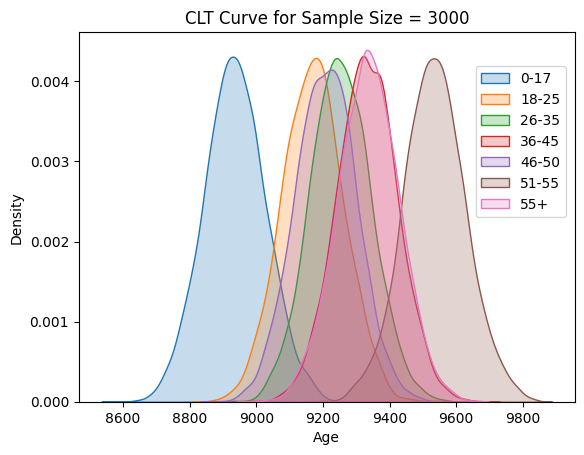

In [78]:
sns.kdeplot(df_3000["0-17"] , fill = True , label = "0-17")
sns.kdeplot(df_3000["18-25"] , fill = True , label = "18-25")
sns.kdeplot(df_3000["26-35"] , fill = True , label = "26-35")
sns.kdeplot(df_3000["36-45"] , fill = True , label = "36-45")
sns.kdeplot(df_3000["46-50"] , fill = True , label = "46-50")
sns.kdeplot(df_3000["51-55"] , fill = True , label = "51-55")
sns.kdeplot(df_3000["55+"] , fill = True , label = "55+")
plt.legend(loc = (0.8 , 0.5))

plt.xlabel("Age")

plt.title("CLT Curve for Sample Size = 3000")
plt.show()

**Confidence Interval for 90%**

In [79]:
percent  = 90
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_age_17 = np.percentile(mean_0_17 , [left_interval , right_interval]).round(0)
interval_age_25 = np.percentile(mean_18_25 , [left_interval , right_interval]).round(0)
interval_age_35 = np.percentile(mean_26_35 , [left_interval , right_interval]).round(0)
interval_age_45 = np.percentile(mean_36_45 , [left_interval , right_interval]).round(0)
interval_age_50 = np.percentile(mean_46_50 , [left_interval , right_interval]).round(0)
interval_age_55 = np.percentile(mean_51_55 , [left_interval , right_interval]).round(0)
interval_age_56 = np.percentile(mean_55 , [left_interval , right_interval]).round(0)

print(f"90% Confidence Interval for people with age 0 - 17 and Sample Size 3000 is [{interval_age_17[0]} - {interval_age_17[1]}]")
print(f"Range = {interval_age_17[1] - interval_age_17[0]}")
print()
print(f"90% Confidence Interval for people with age 18 - 25 and Sample Size 3000 is [{interval_age_25[0]} - {interval_age_25[1]}]")
print(f"Range = {interval_age_25[1] - interval_age_25[0]}")
print()
print(f"90% Confidence Interval for people with age 26 - 35 and Sample Size 3000 is [{interval_age_35[0]} - {interval_age_35[1]}]")
print(f"Range = {interval_age_35[1] - interval_age_35[0]}")
print()
print(f"90% Confidence Interval for people with age 36 - 45 and Sample Size 3000 is [{interval_age_45[0]} - {interval_age_45[1]}]")
print(f"Range = {interval_age_45[1] - interval_age_45[0]}")
print()
print(f"90% Confidence Interval for people with age 46 - 50 and Sample Size 3000 is [{interval_age_50[0]} - {interval_age_50[1]}]")
print(f"Range = {interval_age_50[1] - interval_age_50[0]}")
print()
print(f"90% Confidence Interval for people with age 51 - 55 and Sample Size 3000 is [{interval_age_55[0]} - {interval_age_55[1]}]")
print(f"Range = {interval_age_55[1] - interval_age_55[0]}")
print()
print(f"90% Confidence Interval for people with age 55+ and Sample Size 3000 is [{interval_age_56[0]} - {interval_age_56[1]}]")
print(f"Range = {interval_age_56[1] - interval_age_56[0]}")


90% Confidence Interval for people with age 0 - 17 and Sample Size 3000 is [8782.0 - 9088.0]
Range = 306.0

90% Confidence Interval for people with age 18 - 25 and Sample Size 3000 is [9017.0 - 9322.0]
Range = 305.0

90% Confidence Interval for people with age 26 - 35 and Sample Size 3000 is [9105.0 - 9404.0]
Range = 299.0

90% Confidence Interval for people with age 36 - 45 and Sample Size 3000 is [9180.0 - 9484.0]
Range = 304.0

90% Confidence Interval for people with age 46 - 50 and Sample Size 3000 is [9056.0 - 9356.0]
Range = 300.0

90% Confidence Interval for people with age 51 - 55 and Sample Size 3000 is [9383.0 - 9691.0]
Range = 308.0

90% Confidence Interval for people with age 55+ and Sample Size 3000 is [9182.0 - 9486.0]
Range = 304.0


**Confidence Interval for 95%**

In [80]:
percent  = 95
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_age_17 = np.percentile(mean_0_17 , [left_interval , right_interval]).round(0)
interval_age_25 = np.percentile(mean_18_25 , [left_interval , right_interval]).round(0)
interval_age_35 = np.percentile(mean_26_35 , [left_interval , right_interval]).round(0)
interval_age_45 = np.percentile(mean_36_45 , [left_interval , right_interval]).round(0)
interval_age_50 = np.percentile(mean_46_50 , [left_interval , right_interval]).round(0)
interval_age_55 = np.percentile(mean_51_55 , [left_interval , right_interval]).round(0)
interval_age_56 = np.percentile(mean_55 , [left_interval , right_interval]).round(0)

print(f"95% Confidence Interval for people with age 0 - 17 and Sample Size 3000 is [{interval_age_17[0]} - {interval_age_17[1]}]")
print(f"Range = {interval_age_17[1] - interval_age_17[0]}")
print()
print(f"95% Confidence Interval for people with age 18 - 25 and Sample Size 3000 is [{interval_age_25[0]} - {interval_age_25[1]}]")
print(f"Range = {interval_age_25[1] - interval_age_25[0]}")
print()
print(f"95% Confidence Interval for people with age 26 - 35 and Sample Size 3000 is [{interval_age_35[0]} - {interval_age_35[1]}]")
print(f"Range = {interval_age_35[1] - interval_age_35[0]}")
print()
print(f"95% Confidence Interval for people with age 36 - 45 and Sample Size 3000 is [{interval_age_45[0]} - {interval_age_45[1]}]")
print(f"Range = {interval_age_45[1] - interval_age_45[0]}")
print()
print(f"95% Confidence Interval for people with age 46 - 50 and Sample Size 3000 is [{interval_age_50[0]} - {interval_age_50[1]}]")
print(f"Range = {interval_age_50[1] - interval_age_50[0]}")
print()
print(f"95% Confidence Interval for people with age 51 - 55 and Sample Size 3000 is [{interval_age_55[0]} - {interval_age_55[1]}]")
print(f"Range = {interval_age_55[1] - interval_age_55[0]}")
print()
print(f"95% Confidence Interval for people with age 55+ and Sample Size 3000 is [{interval_age_56[0]} - {interval_age_56[1]}]")
print(f"Range = {interval_age_56[1] - interval_age_56[0]}")


95% Confidence Interval for people with age 0 - 17 and Sample Size 3000 is [8755.0 - 9119.0]
Range = 364.0

95% Confidence Interval for people with age 18 - 25 and Sample Size 3000 is [8990.0 - 9354.0]
Range = 364.0

95% Confidence Interval for people with age 26 - 35 and Sample Size 3000 is [9077.0 - 9434.0]
Range = 357.0

95% Confidence Interval for people with age 36 - 45 and Sample Size 3000 is [9152.0 - 9510.0]
Range = 358.0

95% Confidence Interval for people with age 46 - 50 and Sample Size 3000 is [9029.0 - 9387.0]
Range = 358.0

95% Confidence Interval for people with age 51 - 55 and Sample Size 3000 is [9349.0 - 9725.0]
Range = 376.0

95% Confidence Interval for people with age 55+ and Sample Size 3000 is [9151.0 - 9514.0]
Range = 363.0


**Confidence Interval for 99%**

In [81]:
percent  = 99
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_age_17 = np.percentile(mean_0_17 , [left_interval , right_interval]).round(0)
interval_age_25 = np.percentile(mean_18_25 , [left_interval , right_interval]).round(0)
interval_age_35 = np.percentile(mean_26_35 , [left_interval , right_interval]).round(0)
interval_age_45 = np.percentile(mean_36_45 , [left_interval , right_interval]).round(0)
interval_age_50 = np.percentile(mean_46_50 , [left_interval , right_interval]).round(0)
interval_age_55 = np.percentile(mean_51_55 , [left_interval , right_interval]).round(0)
interval_age_56 = np.percentile(mean_55 , [left_interval , right_interval]).round(0)

print(f"99% Confidence Interval for people with age 0 - 17 and Sample Size 3000 is [{interval_age_17[0]} - {interval_age_17[1]}]")
print(f"Range = {interval_age_17[1] - interval_age_17[0]}")
print()
print(f"99% Confidence Interval for people with age 18 - 25 and Sample Size 3000 is [{interval_age_25[0]} - {interval_age_25[1]}]")
print(f"Range = {interval_age_25[1] - interval_age_25[0]}")
print()
print(f"99% Confidence Interval for people with age 26 - 35 and Sample Size 3000 is [{interval_age_35[0]} - {interval_age_35[1]}]")
print(f"Range = {interval_age_35[1] - interval_age_35[0]}")
print()
print(f"99% Confidence Interval for people with age 36 - 45 and Sample Size 3000 is [{interval_age_45[0]} - {interval_age_45[1]}]")
print(f"Range = {interval_age_45[1] - interval_age_45[0]}")
print()
print(f"99% Confidence Interval for people with age 46 - 50 and Sample Size 3000 is [{interval_age_50[0]} - {interval_age_50[1]}]")
print(f"Range = {interval_age_50[1] - interval_age_50[0]}")
print()
print(f"99% Confidence Interval for people with age 51 - 55 and Sample Size 3000 is [{interval_age_55[0]} - {interval_age_55[1]}]")
print(f"Range = {interval_age_55[1] - interval_age_55[0]}")
print()
print(f"99% Confidence Interval for people with age 55+ and Sample Size 3000 is [{interval_age_56[0]} - {interval_age_56[1]}]")
print(f"Range = {interval_age_56[1] - interval_age_56[0]}")


99% Confidence Interval for people with age 0 - 17 and Sample Size 3000 is [8703.0 - 9172.0]
Range = 469.0

99% Confidence Interval for people with age 18 - 25 and Sample Size 3000 is [8936.0 - 9401.0]
Range = 465.0

99% Confidence Interval for people with age 26 - 35 and Sample Size 3000 is [9033.0 - 9492.0]
Range = 459.0

99% Confidence Interval for people with age 36 - 45 and Sample Size 3000 is [9091.0 - 9571.0]
Range = 480.0

99% Confidence Interval for people with age 46 - 50 and Sample Size 3000 is [8973.0 - 9448.0]
Range = 475.0

99% Confidence Interval for people with age 51 - 55 and Sample Size 3000 is [9293.0 - 9783.0]
Range = 490.0

99% Confidence Interval for people with age 55+ and Sample Size 3000 is [9103.0 - 9574.0]
Range = 471.0


**Sample Size = 30000**

In [82]:
sample_size = 30000

mean_0_17 = []
mean_18_25 = []
mean_26_35 = []
mean_36_45 = []
mean_46_50 = []
mean_51_55 = []
mean_55 = []

for i in range(5000):
  sample_17 = np.random.choice(dt_0_17 , sample_size)
  sample_25 = np.random.choice(dt_18_25 , sample_size)
  sample_35 = np.random.choice(dt_26_35 , sample_size)
  sample_45 = np.random.choice(dt_36_45 , sample_size)
  sample_50 = np.random.choice(dt_46_50 , sample_size)
  sample_55 = np.random.choice(dt_51_55 , sample_size)
  sample_56 = np.random.choice(dt_55 , sample_size)

  sample_mean_17 = np.mean(sample_17)
  sample_mean_25 = np.mean(sample_25)
  sample_mean_35 = np.mean(sample_35)
  sample_mean_45 = np.mean(sample_45)
  sample_mean_50 = np.mean(sample_50)
  sample_mean_55 = np.mean(sample_55)
  sample_mean_56 = np.mean(sample_56)

  mean_0_17.append(sample_mean_17)
  mean_18_25.append(sample_mean_25)
  mean_26_35.append(sample_mean_35)
  mean_36_45.append(sample_mean_45)
  mean_46_50.append(sample_mean_50)
  mean_51_55.append(sample_mean_55)
  mean_55.append(sample_mean_56)

df_30000 = pd.DataFrame({"0-17" : mean_0_17 , "18-25" : mean_18_25 ,"26-35" : mean_26_35 ,"36-45" : mean_36_45 ,"46-50" : mean_46_50 ,"51-55" : mean_51_55 ,"55+" : mean_55 ,})
df_30000.head()


,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,8875.574767,9130.863267,9296.403633,9319.917600,9249.086000,9515.858267,9252.632300
1,8916.886067,9138.610233,9279.755033,9326.576400,9252.661733,9543.959833,9305.345633
2,8956.433267,9152.257200,9268.129733,9363.233333,9178.678933,9575.494500,9399.617233
3,8874.330600,9132.304133,9235.003700,9326.948033,9204.076500,9522.620967,9333.703067
4,8953.093733,9176.853567,9208.088800,9283.268200,9226.328100,9558.727867,9308.942000


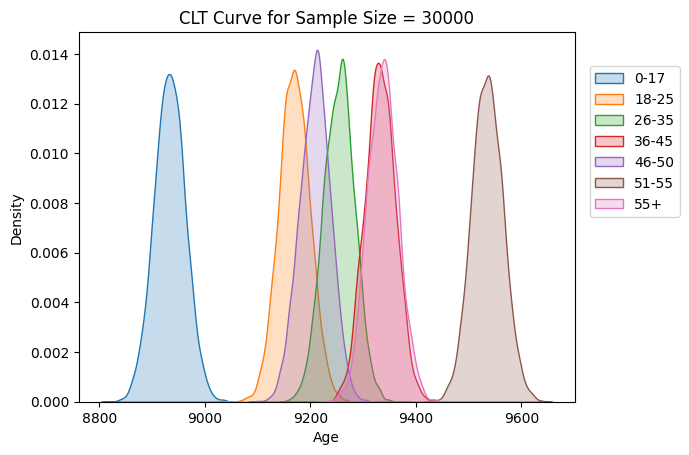

In [83]:
sns.kdeplot(df_30000["0-17"] , fill = True , label = "0-17")
sns.kdeplot(df_30000["18-25"] , fill = True , label = "18-25")
sns.kdeplot(df_30000["26-35"] , fill = True , label = "26-35")
sns.kdeplot(df_30000["36-45"] , fill = True , label = "36-45")
sns.kdeplot(df_30000["46-50"] , fill = True , label = "46-50")
sns.kdeplot(df_30000["51-55"] , fill = True , label = "51-55")
sns.kdeplot(df_30000["55+"] , fill = True , label = "55+")
plt.legend(loc = (1.03 , 0.5))

plt.xlabel("Age")

plt.title("CLT Curve for Sample Size = 30000")
plt.show()

**Confidence Interval for 90%**

In [84]:
percent  = 90
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_age_17 = np.percentile(mean_0_17 , [left_interval , right_interval]).round(0)
interval_age_25 = np.percentile(mean_18_25 , [left_interval , right_interval]).round(0)
interval_age_35 = np.percentile(mean_26_35 , [left_interval , right_interval]).round(0)
interval_age_45 = np.percentile(mean_36_45 , [left_interval , right_interval]).round(0)
interval_age_50 = np.percentile(mean_46_50 , [left_interval , right_interval]).round(0)
interval_age_55 = np.percentile(mean_51_55 , [left_interval , right_interval]).round(0)
interval_age_56 = np.percentile(mean_55 , [left_interval , right_interval]).round(0)

print(f"90% Confidence Interval for people with age 0 - 17 and Sample Size 30000 is [{interval_age_17[0]} - {interval_age_17[1]}]")
print(f"Range = {interval_age_17[1] - interval_age_17[0]}")
print()
print(f"90% Confidence Interval for people with age 18 - 25 and Sample Size 30000 is [{interval_age_25[0]} - {interval_age_25[1]}]")
print(f"Range = {interval_age_25[1] - interval_age_25[0]}")
print()
print(f"90% Confidence Interval for people with age 26 - 35 and Sample Size 30000 is [{interval_age_35[0]} - {interval_age_35[1]}]")
print(f"Range = {interval_age_35[1] - interval_age_35[0]}")
print()
print(f"90% Confidence Interval for people with age 36 - 45 and Sample Size 30000 is [{interval_age_45[0]} - {interval_age_45[1]}]")
print(f"Range = {interval_age_45[1] - interval_age_45[0]}")
print()
print(f"90% Confidence Interval for people with age 46 - 50 and Sample Size 30000 is [{interval_age_50[0]} - {interval_age_50[1]}]")
print(f"Range = {interval_age_50[1] - interval_age_50[0]}")
print()
print(f"90% Confidence Interval for people with age 51 - 55 and Sample Size 30000 is [{interval_age_55[0]} - {interval_age_55[1]}]")
print(f"Range = {interval_age_55[1] - interval_age_55[0]}")
print()
print(f"90% Confidence Interval for people with age 55+ and Sample Size 30000 is [{interval_age_56[0]} - {interval_age_56[1]}]")
print(f"Range = {interval_age_56[1] - interval_age_56[0]}")


90% Confidence Interval for people with age 0 - 17 and Sample Size 30000 is [8884.0 - 8981.0]
Range = 97.0

90% Confidence Interval for people with age 18 - 25 and Sample Size 30000 is [9122.0 - 9217.0]
Range = 95.0

90% Confidence Interval for people with age 26 - 35 and Sample Size 30000 is [9205.0 - 9301.0]
Range = 96.0

90% Confidence Interval for people with age 36 - 45 and Sample Size 30000 is [9285.0 - 9379.0]
Range = 94.0

90% Confidence Interval for people with age 46 - 50 and Sample Size 30000 is [9159.0 - 9255.0]
Range = 96.0

90% Confidence Interval for people with age 51 - 55 and Sample Size 30000 is [9487.0 - 9584.0]
Range = 97.0

90% Confidence Interval for people with age 55+ and Sample Size 30000 is [9290.0 - 9386.0]
Range = 96.0


**Confidence Interval for 95%**

In [85]:
percent  = 95
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_age_17 = np.percentile(mean_0_17 , [left_interval , right_interval]).round(0)
interval_age_25 = np.percentile(mean_18_25 , [left_interval , right_interval]).round(0)
interval_age_35 = np.percentile(mean_26_35 , [left_interval , right_interval]).round(0)
interval_age_45 = np.percentile(mean_36_45 , [left_interval , right_interval]).round(0)
interval_age_50 = np.percentile(mean_46_50 , [left_interval , right_interval]).round(0)
interval_age_55 = np.percentile(mean_51_55 , [left_interval , right_interval]).round(0)
interval_age_56 = np.percentile(mean_55 , [left_interval , right_interval]).round(0)

print(f"95% Confidence Interval for people with age 0 - 17 and Sample Size 30000 is [{interval_age_17[0]} - {interval_age_17[1]}]")
print(f"Range = {interval_age_17[1] - interval_age_17[0]}")
print()
print(f"95% Confidence Interval for people with age 18 - 25 and Sample Size 30000 is [{interval_age_25[0]} - {interval_age_25[1]}]")
print(f"Range = {interval_age_25[1] - interval_age_25[0]}")
print()
print(f"95% Confidence Interval for people with age 26 - 35 and Sample Size 30000 is [{interval_age_35[0]} - {interval_age_35[1]}]")
print(f"Range = {interval_age_35[1] - interval_age_35[0]}")
print()
print(f"95% Confidence Interval for people with age 36 - 45 and Sample Size 30000 is [{interval_age_45[0]} - {interval_age_45[1]}]")
print(f"Range = {interval_age_45[1] - interval_age_45[0]}")
print()
print(f"95% Confidence Interval for people with age 46 - 50 and Sample Size 30000 is [{interval_age_50[0]} - {interval_age_50[1]}]")
print(f"Range = {interval_age_50[1] - interval_age_50[0]}")
print()
print(f"95% Confidence Interval for people with age 51 - 55 and Sample Size 30000 is [{interval_age_55[0]} - {interval_age_55[1]}]")
print(f"Range = {interval_age_55[1] - interval_age_55[0]}")
print()
print(f"95% Confidence Interval for people with age 55+ and Sample Size 30000 is [{interval_age_56[0]} - {interval_age_56[1]}]")
print(f"Range = {interval_age_56[1] - interval_age_56[0]}")


95% Confidence Interval for people with age 0 - 17 and Sample Size 30000 is [8875.0 - 8992.0]
Range = 117.0

95% Confidence Interval for people with age 18 - 25 and Sample Size 30000 is [9112.0 - 9227.0]
Range = 115.0

95% Confidence Interval for people with age 26 - 35 and Sample Size 30000 is [9197.0 - 9311.0]
Range = 114.0

95% Confidence Interval for people with age 36 - 45 and Sample Size 30000 is [9276.0 - 9387.0]
Range = 111.0

95% Confidence Interval for people with age 46 - 50 and Sample Size 30000 is [9151.0 - 9264.0]
Range = 113.0

95% Confidence Interval for people with age 51 - 55 and Sample Size 30000 is [9478.0 - 9594.0]
Range = 116.0

95% Confidence Interval for people with age 55+ and Sample Size 30000 is [9282.0 - 9395.0]
Range = 113.0


**Confidence Interval for 99%**

In [86]:
percent  = 99
left_interval = (100 - percent)/2
right_interval = (100 + percent)/2

interval_age_17 = np.percentile(mean_0_17 , [left_interval , right_interval]).round(0)
interval_age_25 = np.percentile(mean_18_25 , [left_interval , right_interval]).round(0)
interval_age_35 = np.percentile(mean_26_35 , [left_interval , right_interval]).round(0)
interval_age_45 = np.percentile(mean_36_45 , [left_interval , right_interval]).round(0)
interval_age_50 = np.percentile(mean_46_50 , [left_interval , right_interval]).round(0)
interval_age_55 = np.percentile(mean_51_55 , [left_interval , right_interval]).round(0)
interval_age_56 = np.percentile(mean_55 , [left_interval , right_interval]).round(0)

print(f"99% Confidence Interval for people with age 0 - 17 and Sample Size 30000 is [{interval_age_17[0]} - {interval_age_17[1]}]")
print(f"Range = {interval_age_17[1] - interval_age_17[0]}")
print()
print(f"99% Confidence Interval for people with age 18 - 25 and Sample Size 30000 is [{interval_age_25[0]} - {interval_age_25[1]}]")
print(f"Range = {interval_age_25[1] - interval_age_25[0]}")
print()
print(f"99% Confidence Interval for people with age 26 - 35 and Sample Size 30000 is [{interval_age_35[0]} - {interval_age_35[1]}]")
print(f"Range = {interval_age_35[1] - interval_age_35[0]}")
print()
print(f"99% Confidence Interval for people with age 36 - 45 and Sample Size 30000 is [{interval_age_45[0]} - {interval_age_45[1]}]")
print(f"Range = {interval_age_45[1] - interval_age_45[0]}")
print()
print(f"99% Confidence Interval for people with age 46 - 50 and Sample Size 30000 is [{interval_age_50[0]} - {interval_age_50[1]}]")
print(f"Range = {interval_age_50[1] - interval_age_50[0]}")
print()
print(f"99% Confidence Interval for people with age 51 - 55 and Sample Size 30000 is [{interval_age_55[0]} - {interval_age_55[1]}]")
print(f"Range = {interval_age_55[1] - interval_age_55[0]}")
print()
print(f"99% Confidence Interval for people with age 55+ and Sample Size 30000 is [{interval_age_56[0]} - {interval_age_56[1]}]")
print(f"Range = {interval_age_56[1] - interval_age_56[0]}")


99% Confidence Interval for people with age 0 - 17 and Sample Size 30000 is [8859.0 - 9009.0]
Range = 150.0

99% Confidence Interval for people with age 18 - 25 and Sample Size 30000 is [9095.0 - 9245.0]
Range = 150.0

99% Confidence Interval for people with age 26 - 35 and Sample Size 30000 is [9178.0 - 9329.0]
Range = 151.0

99% Confidence Interval for people with age 36 - 45 and Sample Size 30000 is [9258.0 - 9405.0]
Range = 147.0

99% Confidence Interval for people with age 46 - 50 and Sample Size 30000 is [9136.0 - 9280.0]
Range = 144.0

99% Confidence Interval for people with age 51 - 55 and Sample Size 30000 is [9459.0 - 9614.0]
Range = 155.0

99% Confidence Interval for people with age 55+ and Sample Size 30000 is [9259.0 - 9412.0]
Range = 153.0


**Insight :**


*   As the size of the sample increases the confidence interval is becoming more clear and accurate. Hence, more the sample size more precise is the data.
*   From the above graphs its clear that some age groups have overlapping CLT curve whereas some dont.

  *   Age 0 - 17 had the least spending.

  *   Age 18 - 25, 26 - 35, 46 - 50 have almost the same overlapping curve hence they have almost similar purchase characteristics.
  *   Age 36 - 45, 55+ have a overlapping curve thereby indicating that they have a very similar purchase characteristics.

  *   Age 51 - 55 has the highest purchase among all the other age groups.



---


**Recommendations :**


*   As Male customers contributed to majority if the sale compare to Female , Walmart should provide offers in a way which retains the Male customers as well concentrate in increasing the female customers too.
*  The customers in age group 0 - 17 had very less purchase hence Walmart can provide more coupon , sales and offers on the suited products to increase the purchase.
*  Walmart can offer pre sales or more offers to the products preferred by the age group 51 - 55 as they had the maximum amount per purchase.

*   The product categories 5, 1, 8 are sold the most hence Walmart can have huge stock of products from these categories to avoid late deliveries or other related issues.


*  Post sale Walmart can provide deals or cupons and send emails regarding the existing deals or offers to attract the customers thereby having them intact.    



